<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
uni = pd.read_csv('/content/Universities.csv')
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
uni.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
uni = uni.iloc[:,1:]
uni.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


# **Normalize the numerical data**

In [ ]:
std = StandardScaler()
uni_normal = std.fit_transform(uni)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
pca = PCA()
pca_components = pca.fit_transform(uni_normal)

### **Calculate variance**

In [ ]:
var = pca.explained_variance_
var

array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

### **Calculate variance in persentage**

In [ ]:
var_p = pca.explained_variance_ratio_
var_p

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [ ]:
var_c = np.cumsum(np.round(var_p,decimals=4)*100)
var_c

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [ ]:
result = pd.DataFrame({'Variance':var,
              'Variance Persentage':var_p,
              'Cumilative Variance':var_c
              })
result

,Variance,Variance Persentage,Cumilative Variance
0,4.804255,0.768681,76.87
1,0.819600,0.131136,89.98
2,0.298502,0.047760,94.76
3,0.170604,0.027297,97.49
4,0.129486,0.020718,99.56
5,0.027553,0.004408,100.00


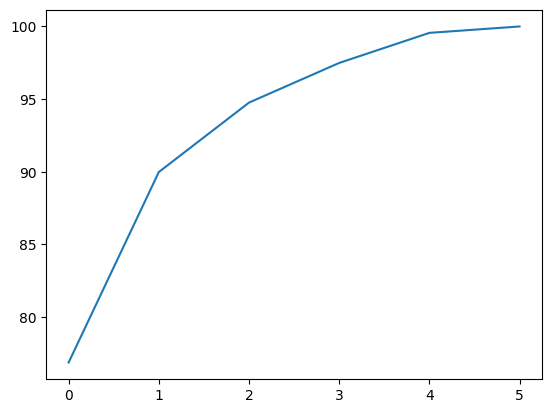

In [ ]:
plt.plot(var_c)

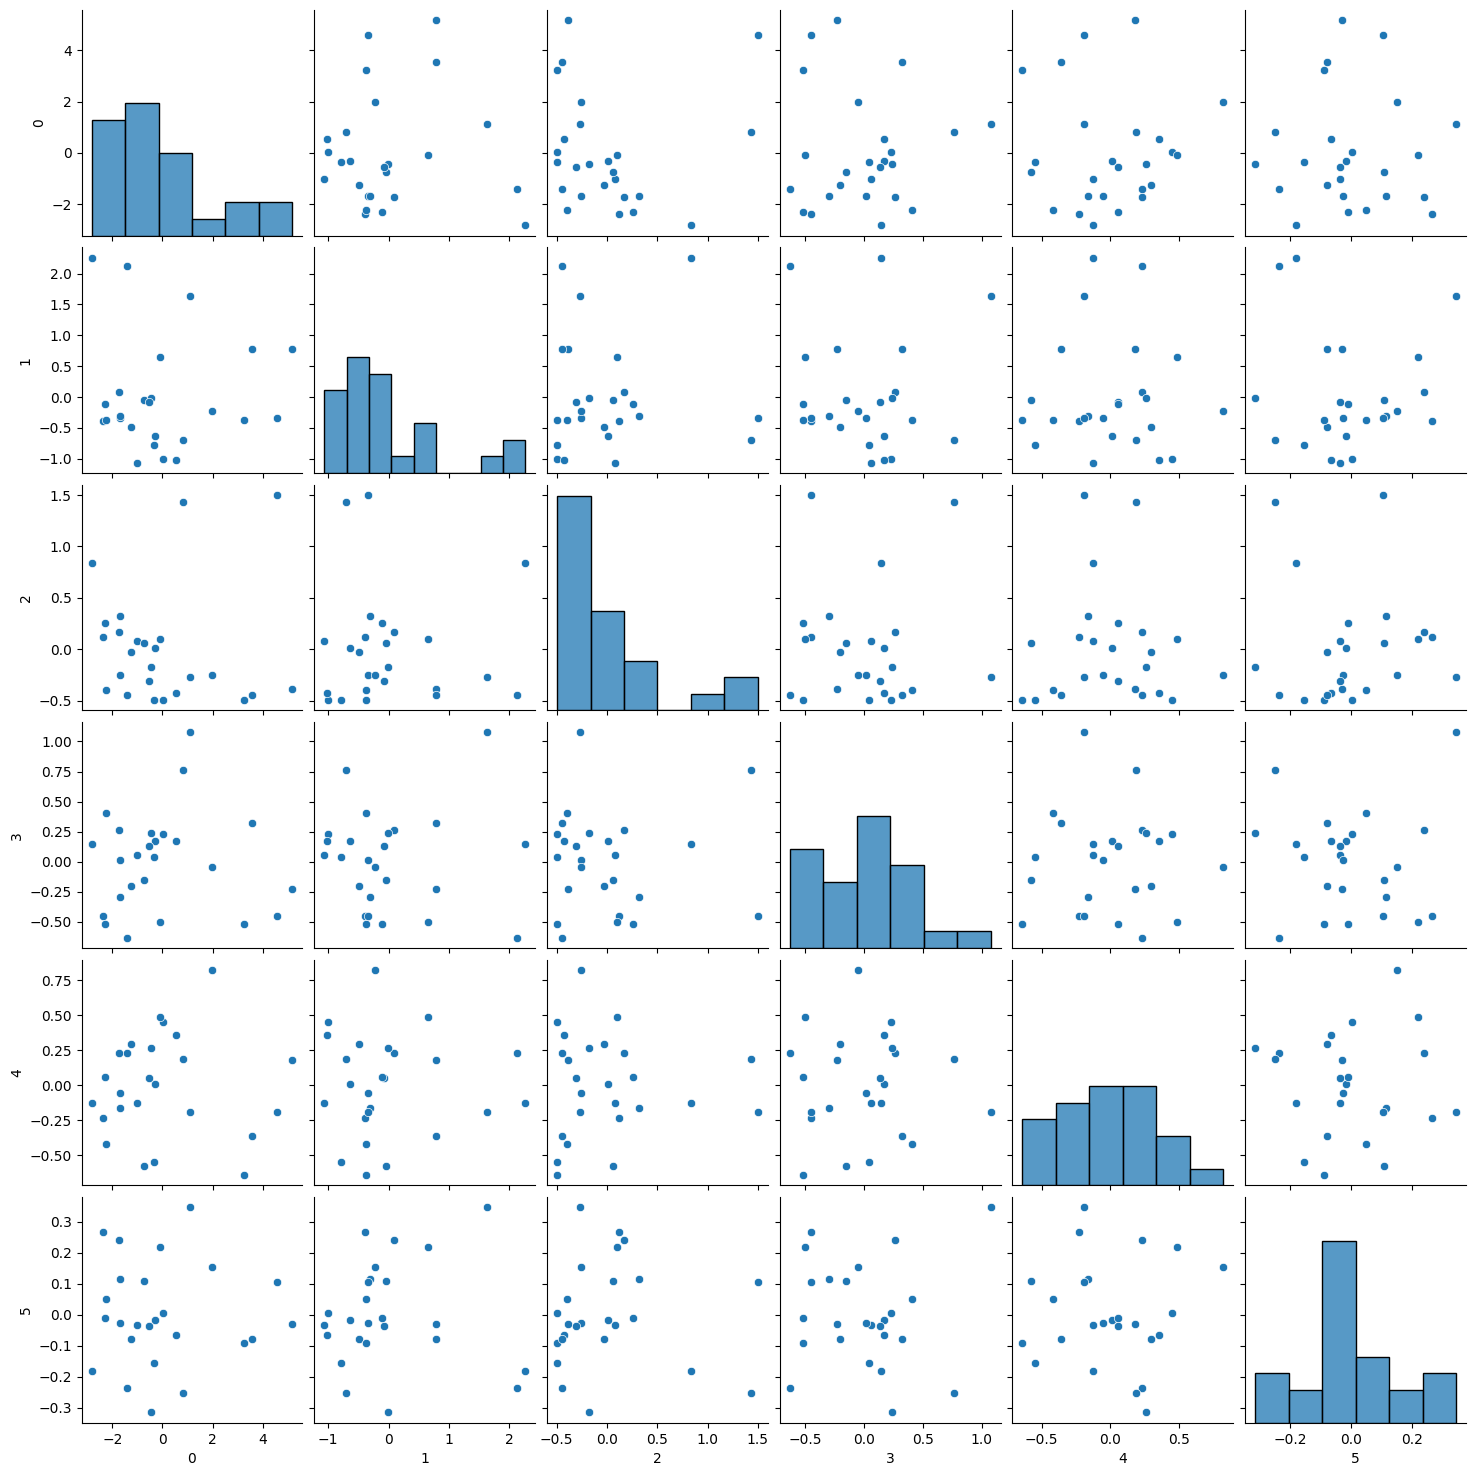

In [ ]:
# Why scattrplot ? - After applying PCA there should not be any corrlation.

import seaborn as sns
sns.pairplot(pd.DataFrame(pca_components))